### Цель работы
Изучение алгоритмов и методов кластеризации на практике.
### Вариант: 2

### Задание:

**Часть 1 — Кластеризация синтетического набора данных методом k‑means:**
1) Использовать функцию для создания набора данных. 
2) Получить с помощью этой функции набор данных (выбрать параметр ```n``` от 30 до 100).
3) Провести стандартизацию данных.
4) С помощью метода ```fit_predict```  обучить модель для кластеризации методом ```Kmeans``` для
трёх кластеров. Выполнить предсказание. Получить метки кластеров.
5) Провести визуализацию кластеров с помощью ```scatter```. Построить графики. Пометить
на графике центры кластеров. Покрасить объекты из разных кластеров разными
цветами.
6) Посчитать коэффициент силуэта.
7) Повторить пункты 4-6 для ```n_clusters = 2``` и ```n_clusters = 4```. Сравнить результаты и сделать выводы.
8) Построить график по “методу локтя” и сделать выводы.

**Часть 2 — Кластеризация реального набора данных по варианту 2 (employee_attrition.csv):**
1) Загрузить набор данных.
2) Провести предварительную обработку данных.
3) Выделить целевую переменную, которую необходимо предсказать. Не включать эту
4) целевую переменную в модель. Построить матрицу диаграмм рассеяния, выделив
значения целевой переменной разными цветами. Выполнить стандартизацию числовых данных.
5) Выполнить кластеризацию объектов методом ```k-means```. Подобрать оптимальное
количество кластеров.
6) Определить объекты, относящиеся к одному кластеру и сделать выводы о каждом
кластере. Подсчитать средние показатели по каждому признаку каждого кластера.
7) Вычислить несколько метрик качества.
8) Для получения оценки 5 - выполнить кластеризацию иерархическим
агломеративным методом. Построить дендрограмму. Сделать выводы об
оптимальном количестве кластеров. Подсчитать средние показатели по каждому
признаку каждого кластера. Вычислить несколько метрик качества.
9) Сделать выводе по работе. Описать, какой метод целесообразнее использовать

### Описание набора данных ```employee_attrition```:
Содержит информацию о сотрудниках:
- ```age``` — возраст сотрудника (лет), числовой.
- ```gender``` — пол: ```M / F```, категориальный.
- ```department``` — департамент: ```Sales / Engineering / HR / Finance / Support```, категориальный.
- ```job_level``` — грейд должности (```1–5```), целочисленный.
- ```marital_status``` — семейное положение: ```Single / Married / Divorced```, категориальный.
- ```monthly_income``` — месячный доход, ```USD/мес, числовой```.
- ```years_at_company``` — годы в компании, целочисленный.
- ```overtime``` — переработки: ```Yes / No```, категориальный.
- ```performance_rating``` — оценка эффективности (```1–4```), целочисленный порядковый.
- ```distance_from_home_km``` — расстояние от дома до офиса, км, числовой.
- ```training_hours_last_year``` — часы обучения за прошлый год, целочисленный.
- ```Attrition``` — целевой класс: ```1``` — уволился, ```0``` — остался.

# 1. Часть 1. Кластеризация синтетического набора данных методом k‑means

В первой части работы рассматривается синтетический двумерный набор данных с заранее заданной кластерной структурой. Такой набор позволяет в контролируемых условиях продемонстрировать, как алгоритм k‑means разделяет объекты на группы, как меняется качество кластеризации при различном числе кластеров и как выглядят полученные кластеры на плоскости.

На следующих шагах будет использована специальная функция для генерации точек с помощью нормальных распределений и фиксированных смещений, затем полученный набор данных будет использован для обучения модели k‑means и расчёта метрик качества.


### 1.1 Использование функции для создания набора данных
Создание набора данных и проверка данных.


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# sklearn для масштабирования, кластеризации и метрик
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Функция генерации данных
def make_data(n, seed):
    np.random.seed(seed)

    # матрица сдвигов для трёх центров (3 центра, каждый с координатами x,y)
    shift_matrix = np.array([[3, 3],
                             [6, 9],
                             [9, 3]])

    # генерируем случайные значения и сдвигаем их к центрам
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))

    # масштабируем по осям: x растягиваем сильнее (умножаем на 20), y — слабее (0.5)
    data *= np.array([[20, 0.5]])

    # создаём DataFrame с колонками 'x' и 'y'
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                      columns=['x', 'y'])

    # перемешиваем строки, чтобы порядок был случайным
    df = df.sample(frac=1.0, random_state=seed).reset_index(drop=True)

    return df


# Создаём датасет
n = 50     
seed = 42
df = make_data(n=n, seed=seed)

print("Первые 5 строк:")
display(df.head())

Первые 5 строк:


,x,y
0,91.962979,4.670576
1,41.839518,1.680818
2,170.292729,1.279978
3,121.993027,4.367672
4,100.189273,4.506501


In [63]:
print("\nСтатистика по признакам:")
display(df.describe())


Статистика по признакам:


,x,y
count,150.000000,150.000000
mean,119.241386,2.513417
std,55.999458,1.515214
min,20.806598,-0.120634
25%,67.032764,1.346669
50%,120.337163,1.859191
75%,166.959349,4.115373
max,257.054630,5.860085


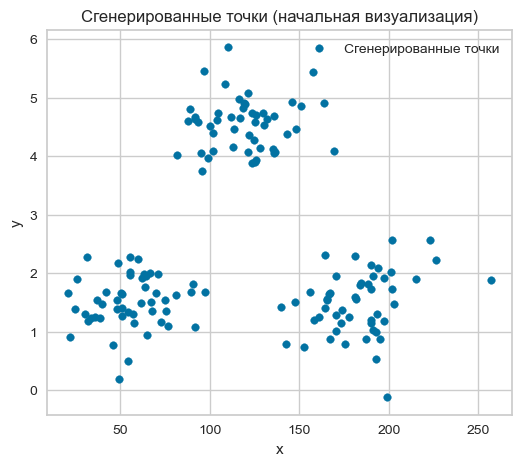

In [64]:
plt.figure(figsize=(6,5))
plt.scatter(df['x'], df['y'], s=30, label='Сгенерированные точки')
plt.title("Сгенерированные точки (начальная визуализация)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend() 
plt.show()

После генерации набора данных с помощью функции ```make_data()``` были получены 150 объектов (3 группы по ```n```=50), каждая из которых описана двумя признаками: ```x``` и ```y```.
1. Анализ графика:
На начальной визуализации отчётливо видны три плотные, компактные группы точек, хорошо разделённые друг от друга как по оси ```x```, так и по оси ```y```.
Это подтверждает, что функция корректно сформировала три кластера со смещёнными центрами.
В левом нижнем секторе - группа с меньшими ```x``` (примерно 40-70) и низкими ```y``` (0.5-2.5).
В правом нижнем секторе - группа с ```x``` примерно 150–220 и ```y``` в интервале 0.5-2.5.
В верхнем секторе - группа с ```x``` примерно 80–140 и высокими ```y``` (4–6).
Группы почти не пересекаются и визуально имеют форму «рассеяния» вокруг трёх разных центров - что соответствует заложенной генерации.
2. Анализ первых строк таблицы:
Из них видно, что точки действительно попадают в различные группы:
- значения ```x``` варьируются от 40 до 170,
- значения ```y``` попадают либо в «нижний диапазон» (около 1-2), либо в «верхний» (4-5).
3. Анализ статистики:
Признак ```x```
- Среднее: 119.24
- Стандартное отклонение: 56 - данные сильно растянуты
- Разброс: от 20.8 до 257 - две нижние группы смещены далеко друг от друга по оси ```x```
- Медиана: 120.34 - примерно совпадает с серединой между двумя «нижними» центрами и верхним
Признак ```y```
- Среднее: 2.51
- Стандартное отклонение: 1.51 (небольшое)
- Разброс: от –0.12 до 5.86
- Медиана: 1.86 - соответствует нижним двум кластерам
Характер статистики подтверждает:
- по x данные хорошо разделены по трём уровням, т.к. std велик,
- по y есть две основные группы: нижняя (1-2) и верхняя (4-6).

Сгенерированный набор данных корректно отражает трёхкластерную структуру, задуманную функцией ```make_data()```.
На визуализации видно чёткое разделение на три компактных, изолированных группы, что создаёт идеальные условия для последующей кластеризации методом ```KMeans```.
Статистические показатели подтверждают различия между группами:
- признак ```x``` различает главным образом три кластера,
- признак ```y``` различает верхний и нижние два кластера.
Признаки имеют разные масштабы, особенно ```x``` (диапазон 20-250), поэтому стандартизация обязательна для корректной работы алгоритма кластеризации.

### 1.2 Стандартизация данных и кластеризация при k = 3
Стандартизация.



Коэффициент силуэта (k = 3): 0.7242054688229007


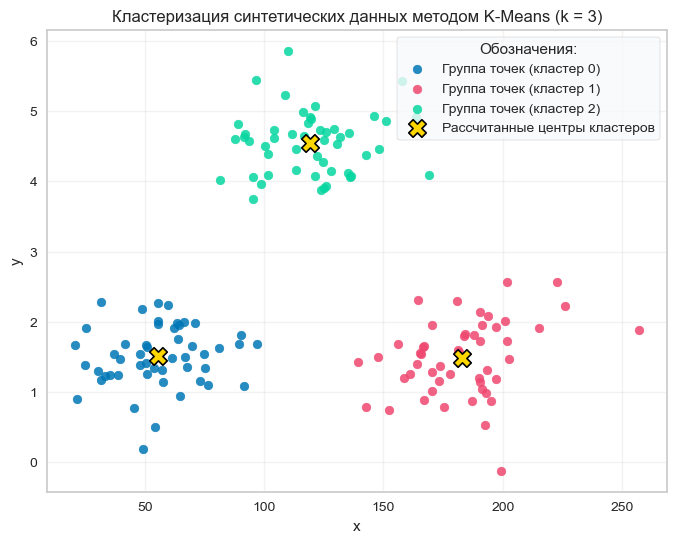

In [65]:
# стандартизация признаков x и y 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["x", "y"]])

# обучение модели k-means для трёх кластеров 
km3 = KMeans(n_clusters=3, random_state=seed, n_init=10)

# fit_predict обучает модель и сразу возвращает метки
labels3 = km3.fit_predict(X_scaled)

# расчёт коэффициента силуэта 
sil3 = silhouette_score(X_scaled, labels3)
print("Коэффициент силуэта (k = 3):", sil3)

# обратное преобразование центров кластеров
centers3 = scaler.inverse_transform(km3.cluster_centers_)

plt.figure(figsize=(8, 6))

cluster_colors = ["#0077b6", "#ef476f", "#06d6a0"] 

for lab, color in zip(np.unique(labels3), cluster_colors):
    plt.scatter(
        df["x"].values[labels3 == lab],
        df["y"].values[labels3 == lab],
        s=40,
        color=color,
        label=f"Группа точек (кластер {lab})",
        alpha=0.85,
    )

plt.scatter(
    centers3[:, 0],
    centers3[:, 1],
    color="gold",
    s=160,
    marker="X",
    edgecolor="black",
    linewidth=1.2,
    label="Рассчитанные центры кластеров",
)

plt.title("Кластеризация синтетических данных методом K-Means (k = 3)")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(
    title="Обозначения:",
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    shadow=False,
    facecolor="#f8f9fa",
    edgecolor="#b0b0b0",
    loc="upper right" 
)

plt.grid(alpha=0.25)
plt.show()


1. **Успешное выделение кластеров:** Алгоритм K-Means корректно разделил синтетические данные на три отдельные группы. Каждая группа (кластер 0, 1, 2) визуально представляет собой компактное облако точек, хорошо отделенное от других.
2. **Оптимальность k=3:** Высокий коэффициент силуэта (0.724) подтверждает, что кластеризация является качественной. Это означает, что точки внутри каждого кластера находятся близко друг к другу (высокая компактность), а сами кластеры достаточно далеко друг от друга (хорошая разделенность).
3. **Положение центров:** Рассчитанные центры кластеров (желтые крестики) находятся в геометрических центрах соответствующих групп точек, что свидетельствует о правильной работе алгоритма.
4. **Структура данных:** График наглядно демонстрирует, что исходные данные имели три естественных группы (облака), и метод K-Means успешно их восстановил. Это подтверждает, что выбор числа кластеров k=3 был обоснован.
Таким образом, при k=3 достигнуто оптимальное разделение данных, соответствующее их внутренней структуре.

## 1.3 Кластеризация при k = 2 и k = 4

Коэффициент силуэта (k = 2): 0.49890989516429823


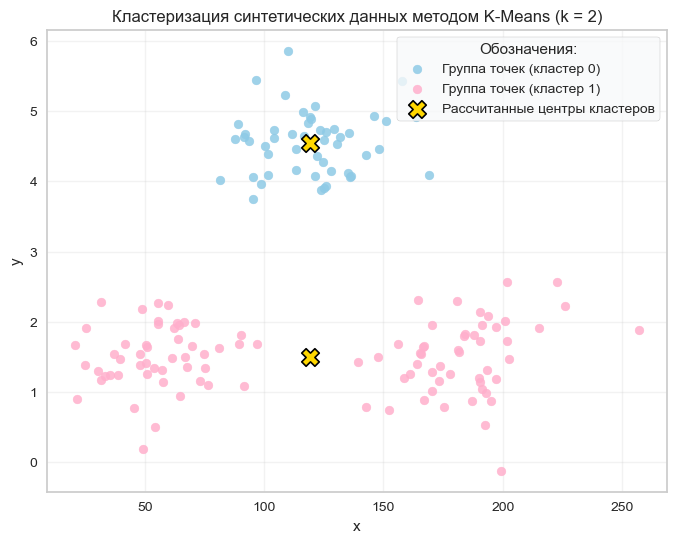

In [66]:
# обучение модели
km2 = KMeans(n_clusters=2, random_state=seed, n_init=10)

# fit_predict возвращает метки кластеров
labels2 = km2.fit_predict(X_scaled)

# коэффициент силуэта
sil2 = silhouette_score(X_scaled, labels2)
print("Коэффициент силуэта (k = 2):", sil2)

# обратное преобразование центров
centers2 = scaler.inverse_transform(km2.cluster_centers_)

# визуализация
plt.figure(figsize=(8, 6))

cluster_colors_2 = ["#8ecae6", "#ffafcc"]

for lab, color in zip(np.unique(labels2), cluster_colors_2):
    plt.scatter(
        df["x"].values[labels2 == lab],
        df["y"].values[labels2 == lab],
        s=40,
        color=color,
        label=f"Группа точек (кластер {lab})",
        alpha=0.85,
    )

plt.scatter(
    centers2[:, 0],
    centers2[:, 1],
    color="gold",
    s=160,
    marker="X",
    edgecolor="black",
    linewidth=1.2,
    label="Рассчитанные центры кластеров",
)

plt.title("Кластеризация синтетических данных методом K-Means (k = 2)")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(
    title="Обозначения:",
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    facecolor="#f8f9fa",
    edgecolor="#b0b0b0",
    loc="upper right"
)

plt.grid(alpha=0.25)
plt.show()

Коэффициент силуэта (k = 4): 0.6104795001622662


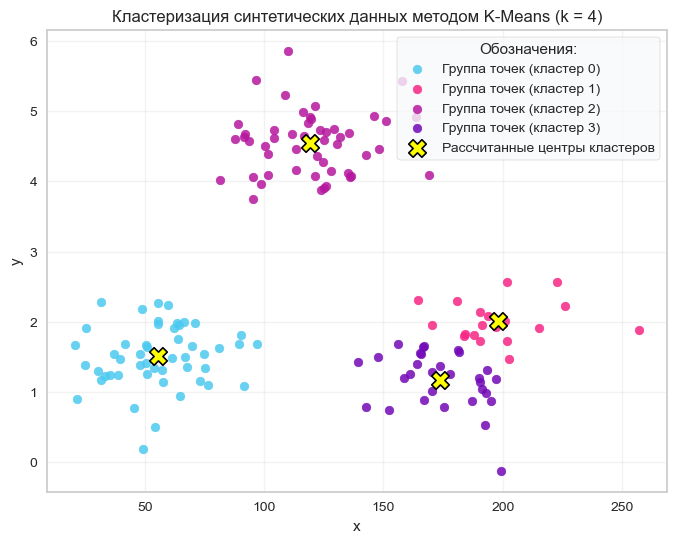

In [67]:
km4 = KMeans(n_clusters=4, random_state=seed, n_init=10)
labels4 = km4.fit_predict(X_scaled)

sil4 = silhouette_score(X_scaled, labels4)
print("Коэффициент силуэта (k = 4):", sil4)

centers4 = scaler.inverse_transform(km4.cluster_centers_)

plt.figure(figsize=(8, 6))

cluster_colors_4 = ["#4cc9f0", "#f72585", "#b5179e", "#7209b7"]  

for lab, color in zip(np.unique(labels4), cluster_colors_4):
    plt.scatter(
        df["x"].values[labels4 == lab],
        df["y"].values[labels4 == lab],
        s=40,
        color=color,
        label=f"Группа точек (кластер {lab})",
        alpha=0.85,
    )

plt.scatter(
    centers4[:, 0],
    centers4[:, 1],
    color="yellow",
    s=160,
    marker="X",
    edgecolor="black",
    linewidth=1.2,
    label="Рассчитанные центры кластеров",
)

plt.title("Кластеризация синтетических данных методом K-Means (k = 4)")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(
    title="Обозначения:",
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    facecolor="#f8f9fa",
    edgecolor="#b0b0b0",
    loc="upper right"
)

plt.grid(alpha=0.25)
plt.show()

## 1.4 Сравнение кластеризаций для k = 2, 3 и 4

**Сравнение результатов и выводы:**
1.  **Коэффициент силуэта:**
    *   ```k=2```: 0.499
    *   ```k=3```: 0.724
    *   ```k=4```: 0.610
    Коэффициент силуэта для ```k=3``` является наивысшим, что указывает на наилучшее качество кластеризации по этому критерию. Это означает, что при ```k=3``` точки внутри каждого кластера максимально близки друг к другу, а сами кластеры максимально удалены друг от друга.
2.  **Визуальный анализ:**
    *   При ```k=2```: алгоритм объединяет три естественных облака данных в два кластера. Один кластер (голубой) поглощает нижнее левое облако и часть верхнего центрального, а другой (розовый) - правое нижнее и оставшуюся часть центрального. Центры кластеров находятся в "промежутках" между истинными группами, что свидетельствует о неоптимальном разделении.
    *   При ```k=4```: алгоритм разбивает данные на четыре группы. Визуально видно, что одно из трех исходных облаков (центральное, розовое на графике ```k=3```) было искусственно разделено на два кластера (розовый и фиолетовый). Это приводит к тому, что внутри этих двух новых кластеров точки менее компактны, а сами кластеры слишком близко расположены друг к другу, что снижает общую "качество" группировки.
3.  **Общий вывод:**
    Сравнение коэффициента силуэта и визуальных графиков однозначно показывает, что оптимальное число кластеров для данного набора данных - 3. При этом:
    *   ```k=2``` недостаточно для описания структуры данных (недообучение).
    *   ```k=4``` приводит к избыточному разделению, когда один из реальных кластеров разбивается на части (переобучение).
    Результат ```k=3``` соответствует истинной структуре сгенерированных данных, состоящей из трех групп.


## 1.5 Построение графика по методу локтя
Для построения графика будет использован визуализатор `KElbowVisualizer` из библиотеки `yellowbrick`: он обучает модель k‑means для нескольких значений `k`, рассчитывает показатель "distortion" и строит график зависимости этой метрики от числа кластеров. По характерному перелому "локтю" на этом графике можно сделать вывод об оптимальном количестве кластеров для рассматриваемого набора данных.


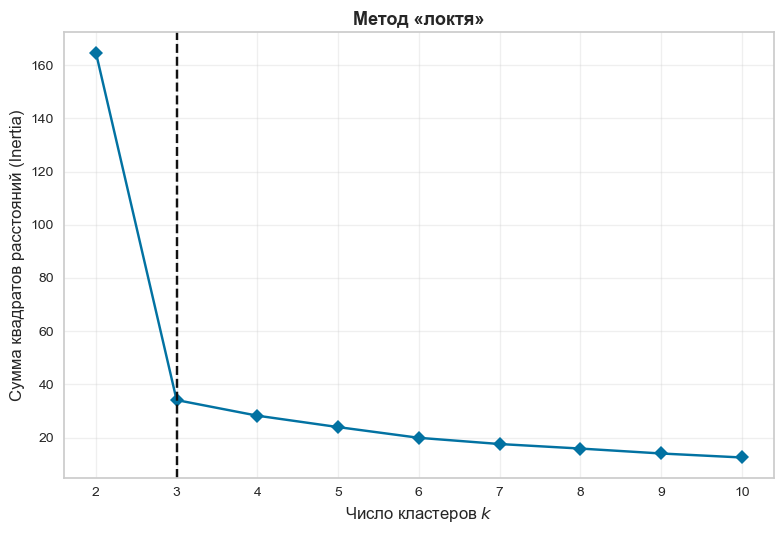

In [68]:
# построение графика по методу локтя с помощью KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
km_emp = KMeans(random_state=42, n_init=10)
visualizer_emp = KElbowVisualizer(km_emp, k=(2, 11), timings=False)

visualizer_emp.fit(X_scaled)

ax = visualizer_emp.ax
ax.set_xlabel('Число кластеров $k$', fontsize=12)
ax.set_ylabel('Сумма квадратов расстояний (Inertia)', fontsize=12)
ax.set_title('Метод «локтя»', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)

if ax.get_legend():
    handles, labels = ax.get_legend_handles_labels()
    
plt.tight_layout()
plt.show()

График показывает зависимость "Distortion score" (суммы квадратов расстояний от точек до центров кластеров) от числа кластеров ```k```.
1.  **Наличие "локтя":** На графике четко видна точка излома ("локоть") при ```k = 3```. До этого значения (при k=1, k=2) значение Distortion Score резко падает, что означает значительное улучшение качества кластеризации с увеличением числа кластеров.
2.  **Оптимальное значение k:** После точки ```k=3``` снижение Distortion Score становится значительно более плавным и незначительным. Это говорит о том, что добавление дополнительных кластеров (```k>3```) не приводит к существенному улучшению модели - происходит "переобучение" или искусственное дробление уже выявленных групп.
3.  **Подтверждение предыдущих результатов:** Метод локтя однозначно указывает на ```k=3``` как оптимальное число кластеров, что полностью согласуется с выводами, сделанными ранее на основе коэффициента силуэта и визуального анализа кластеров. Оба метода подтверждают, что данные имеют три естественные группы.

Таким образом, для данного набора данных оптимальным числом кластеров является 3.

### 1.6 Вывод (Часть 1)

Для синтетических данных, сгенерированных как три отдельных облака, метод k-means корректно выделяет структуру при ```k = 3```:
1) коэффициент силуэта максимален (0.72),
2) кластеры визуально компактны и хорошо разделимы,
3) центры кластеров расположены в центрах облаков.
При ```k = 2``` происходит недообучение (объединение разных групп), при ```k = 4``` - переобучение (искусственное дробление одного кластера).
Метод «локтя» также указывает на ```k = 3``` как оптимальное значение.
Таким образом, ```k = 3``` - объективно оптимальное число кластеров, соответствующее истинной структуре данных.


### 2. Часть 2. Кластеризация набора данных ```employee_attrition```

### 2.1 Загрузка и первичный анализ набора данных

На этом шаге загружается набор данных employee_attrition из папки datasets, выполняется первичный осмотр структуры датафрейма и базовая описательная статистика по числовым признакам. Дополнительно выводятся несколько первых строк таблицы и распределение по ключевым категориальным столбцам, чтобы оценить состав выборки и понять, какие признаки будут использоваться на следующих этапах предобработки и кластеризации.


In [69]:
# загрузка датасета и первичный осмотр
emp_df = pd.read_csv("employee_attrition.csv")

print("размер датасета:", emp_df.shape)
print()

print("первые строки датафрейма:")
print(emp_df.head())
print()

print("информация о столбцах:")
print(emp_df.info())
print()

print("описательная статистика по числовым признакам:")
print(emp_df.describe())
print()

print("распределение по департаментам:")
print(emp_df["department"].value_counts())
print()

print("распределение по целевой переменной Attrition:")
print(emp_df["Attrition"].value_counts())

print("проверка на пропушенные значения:")
missing_values = emp_df.isnull().sum()
print(missing_values)

размер датасета: (3048, 12)

первые строки датафрейма:
   age gender   department  job_level marital_status  monthly_income  \
0   31      F  Engineering          1         Single          5163.0   
1   29      M        Sales          2       Divorced         13878.0   
2   26      F      Support          1        Married          4712.0   
3   61      F  Engineering          2         Single         12196.0   
4   59      F        Sales          5         Single         15823.0   

   years_at_company overtime  performance_rating  distance_from_home_km  \
0                14       No                   3                   24.1   
1                 1       No                   3                    4.6   
2                 6       No                   3                    8.4   
3                12      Yes                   4                    2.2   
4                18       No                   4                    7.2   

   training_hours_last_year  Attrition  
0                   

## 2.2 Предварительная обработка и краткие выводы по структуре данных

Вывод по предварительной обработке данных:
Датасет содержит 3048 записей о сотрудниках и 12 признаков, включая целевую переменную ```Attrition``` (уволился: 1 / остался: 0).
Основные характеристики данных:
1) Пропусков нет - все 3048 × 12 значений заполнены.
2) Типы данных корректны: 5 числовых (int64), 3 вещественных (float64), 4 категориальных (object).
Демографическая и организационная структура:
1) Средний возраст - 41 год, разброс широкий (18–64 лет).
2) Средний стаж - 20 лет, что указывает на зрелую, стабильную компанию.
3) Оценка эффективности (```performance_rating```) в среднем - 2.84 (шкала 1-4), т.е. около «удовлетворительно».
4) Уровень увольнений (```Attrition```) - 9.1% (278 человек), что типично для HR-аналитики.

Данные в целом качественные и готовы к дальнейшей обработке. Числовые признаки (возраст, уровень должности, стаж в компании, доход, расстояние до офиса, часы обучения и оценка эффективности) находятся в разумных диапазонах значений и не содержат явно аномальных экстремумов, поэтому в дальнейшем для них достаточно стандартизации без дополнительной очистки от выбросов.

## 2.3 Выделение целевой переменной и матрица диаграмм рассеяния

Далее в качестве целевой переменной для анализа выбирается столбец Attrition, который отражает факт увольнения сотрудника (1 - сотрудник уволился, 0 - остался). Эта переменная исключается из признакового пространства, так как методы кластеризации относятся к обучению без учителя и не должны использовать информацию о целевом классе при построении кластеров.

Для числовых признаков строится матрица диаграмм рассеяния (pairplot), в которой точки дополнительно раскрашиваются по значению Attrition. Это позволяет визуально оценить, как распределяются уволившиеся и оставшиеся сотрудники в пространстве исходных признаков и есть ли заметные разделяющие границы, которые потенциально могут быть учтены при последующей кластеризации.


числовые признаки: ['age', 'job_level', 'monthly_income', 'years_at_company', 'performance_rating', 'distance_from_home_km', 'training_hours_last_year']
категориальные признаки: ['gender', 'department', 'marital_status', 'overtime']


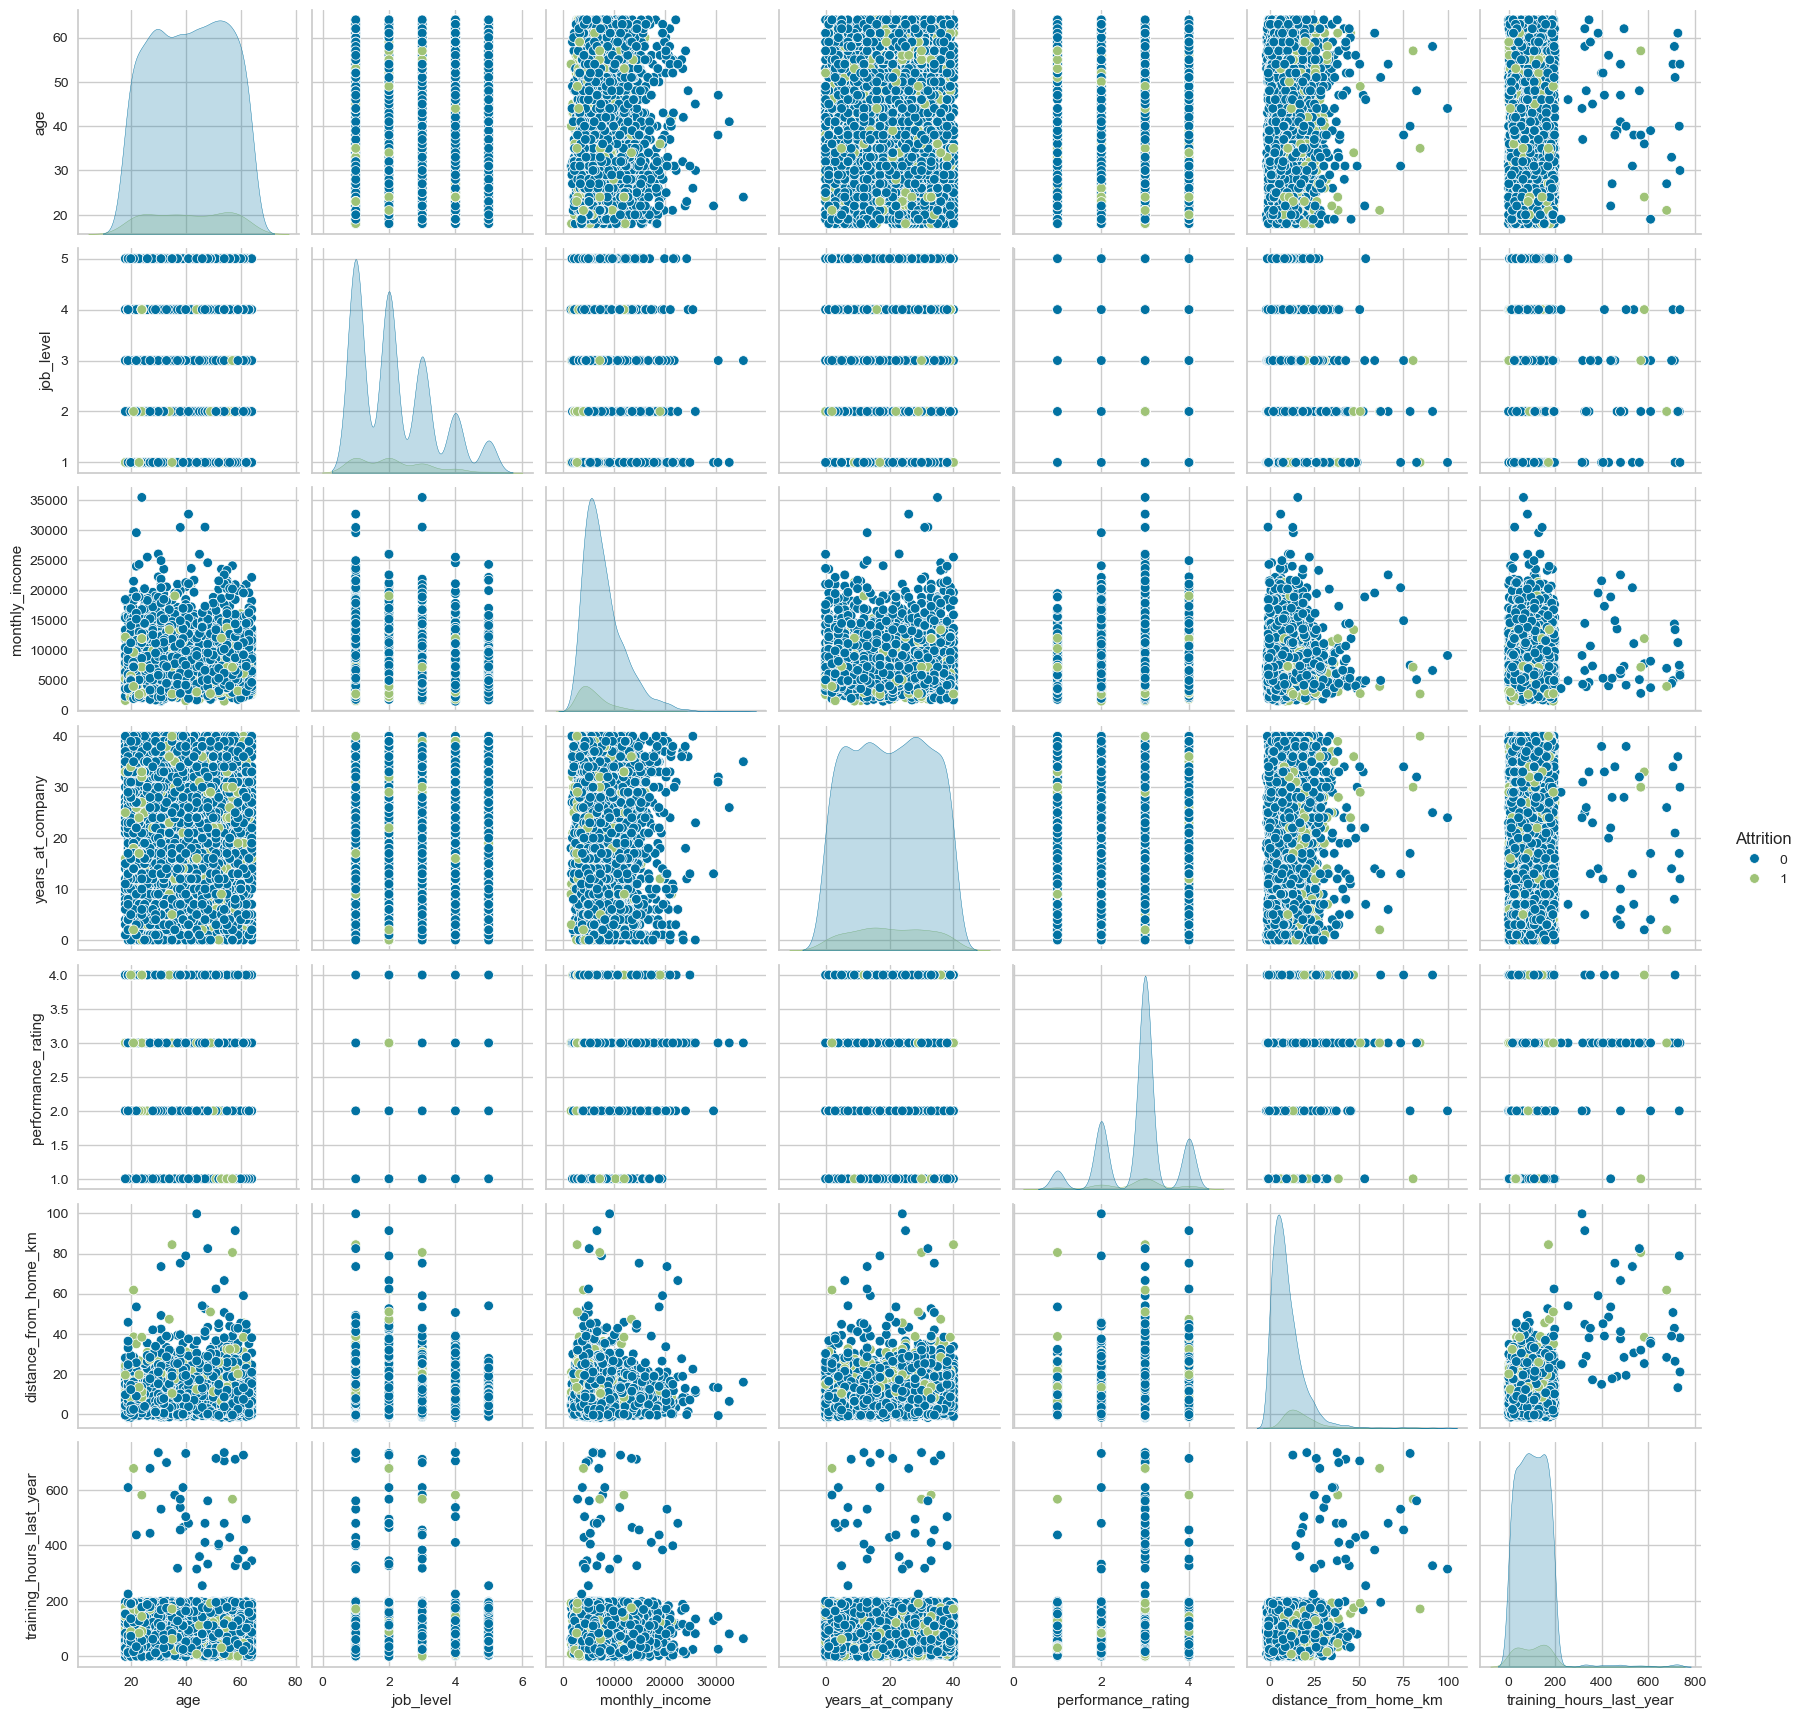

In [70]:
# выделение целевой переменной Attrition и построение матрицы диаграмм рассеяния
import seaborn as sns

# целевая переменная - Attrition (будет использоваться только для интерпретации кластеров)
target_col = "Attrition"
y = emp_df[target_col].copy()
X = emp_df.drop(columns=[target_col]).copy()

# списки числовых и категориальных признаков
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("числовые признаки:", num_cols)
print("категориальные признаки:", cat_cols)

# матрица диаграмм рассеяния для числовых признаков с раскраской по Attrition
sns.pairplot(emp_df, vars=num_cols, hue=target_col)
plt.show()

## 2.4 Выводы по матрице диаграмм рассеяния

1) Отток сотрудников (```Attrition = 1```, зелёные точки) визуально концентрируется в определённых зонах:
- Более низкий доход: Сотрудники с увольнением чаще встречаются в нижней части графиков ```monthly_income``` (до 5000-8000$).
- Меньший стаж: В группе уволившихся преобладают сотрудники с меньшим стажем (```years_at_company```), особенно до 10 лет.
- Молодой возраст: Хотя распределение по возрасту (```age```) широкое, среди уволившихся больше молодых сотрудников (до 35 лет).
- Работа сверхурочно: На графике ```overtime``` видно, что сотрудники, работающие сверхурочно, чаще увольняются.
2) Некоторые признаки не показывают явной связи с оттоком:
- ```performance_rating```: Распределение оценок эффективности для уволившихся и оставшихся практически совпадает - отток не связан напрямую с плохой производительностью.
- ```distance_from_home_km```: Нет чёткой корреляции между расстоянием до офиса и увольнением.
3) Общая картина: Матрица подтверждает гипотезу, что увольнения часто связаны с начальным этапом карьеры в компании (малый стаж), низким уровнем вознаграждения и высокой нагрузкой (сверхурочные). Это позволяет предположить, что основными факторами оттока являются неудовлетворённость зарплатой и рабочими условиями, а не профессиональная неэффективность.
4) По матрице диаграмм рассеяния видно, что объекты с ```Attrition = 1``` встречаются существенно реже, чем с ```Attrition = 0```, и в большинстве проекций сильно перекрываются с основной массой точек. Однако можно заметить, что уволившиеся сотрудники чаще встречаются среди работников с меньшим стажем в компании и более низким уровнем дохода и грейда должности: в областях больших значений ```years_at_company```, ```job_level``` и ```monthly_income``` точек с ```Attrition = 1``` заметно меньше.

**Вывод:**
Для таких признаков, как ```age```, ```performance_rating``` и ```training_hours_last_year```, разделяющие границы по факту увольнения выражены значительно слабее: уволившиеся и оставшиеся сотрудники распределены по этим осям схожим образом. В целом матрица рассеяния показывает, что линейно разделить два класса по исходным числовым признакам сложно, что мотивирует использование кластеризации и последующего анализа полученных групп.

## 2.5 Стандартизация числовых данных и кодирование категориальных признаков

На следующем шаге выполняется подготовка признаков для дальнейшей кластеризации: числовые столбцы масштабируются с помощью StandardScaler, а категориальные признаки переводятся в числовой формат с помощью one-hot кодирования.

В результате формируется матрица признаков X_final, в которой все признаки приведены к сопоставимому масштабу и готовы для обучения моделей кластеризации. Целевая переменная Attrition при этом не включается в X_final и будет использоваться только для последующей интерпретации полученных кластеров и расчета внешних метрик качества.


In [71]:
# стандартизация числовых признаков и one-hot кодирование категориальных столбцов

num_scaler = StandardScaler()

# стандартизация числовых признаков
X_num_scaled = num_scaler.fit_transform(emp_df[num_cols])
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=num_cols)

# one-hot кодирование категориальных признаков
X_cat_encoded = pd.get_dummies(emp_df[cat_cols], prefix=cat_cols)

# объединение числовых и категориальных признаков в единый датафрейм
X_final = pd.concat([X_num_scaled_df, X_cat_encoded], axis=1)

print("размер итоговой матрицы признаков:", X_final.shape)
X_final.head()


размер итоговой матрицы признаков: (3048, 19)


,age,job_level,monthly_income,years_at_company,performance_rating,distance_from_home_km,training_hours_last_year,gender_F,gender_M,department_Engineering,department_Finance,department_HR,department_Sales,department_Support,marital_status_Divorced,marital_status_Married,marital_status_Single,overtime_No,overtime_Yes
0,-0.767569,-1.020047,-0.632023,-0.516075,0.220018,1.505762,0.471737,True,False,True,False,False,False,False,False,False,True,True,False
1,-0.916495,-0.162127,1.515497,-1.615482,0.220018,-0.612198,0.471737,False,True,False,False,False,True,False,True,False,False,True,False
2,-1.139883,-1.020047,-0.743157,-1.192633,0.220018,-0.199467,0.563286,True,False,False,False,False,False,True,False,True,False,True,False
3,1.466318,-0.162127,1.101025,-0.685215,1.583058,-0.872870,-0.090635,True,False,True,False,False,False,False,False,False,True,False,True
4,1.317392,2.411635,1.994778,-0.177796,1.583058,-0.329803,-1.241536,True,False,False,False,False,True,False,False,False,True,True,False


## 2.6 Кластеризация объектов методом k-means и подбор числа кластеров

На этом шаге выполняется кластеризация сотрудников по матрице признаков X_final с помощью алгоритма k-means. Сначала подбирается подходящее число кластеров k по методу локтя: для ряда значений k строится график зависимости distortion score от количества кластеров, и по характерному перелому определяется диапазон разумных значений k.

После анализа графика будет выбрано конкретное значение k, на котором обучится финальная модель k-means; далее для получившихся кластеров будут рассчитаны размеры групп и средние значения признаков, а также внутренние и внешние метрики качества кластеризации.


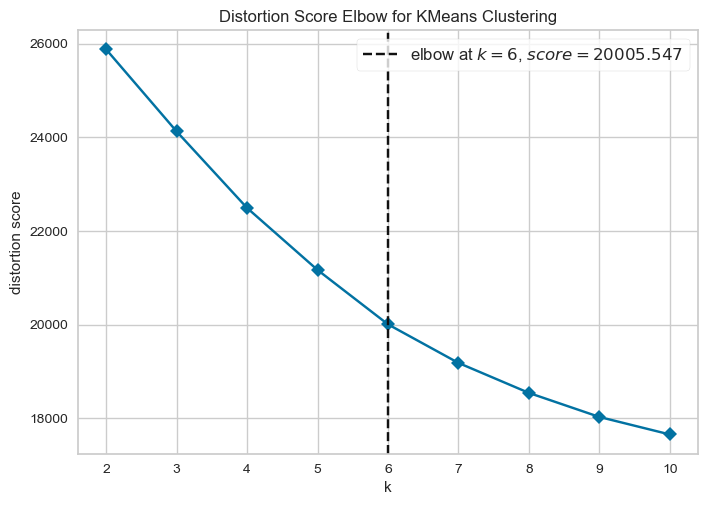

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
# подбор числа кластеров по методу локтя для матрицы X_final

km_emp = KMeans(random_state=42, n_init=10)

visualizer_emp = KElbowVisualizer(km_emp, k=(2, 11), timings=False)
visualizer_emp.fit(X_final)
visualizer_emp.show()


## 2.7 Обучение модели k-means при k = 6 и анализ кластеров

По графику метода локтя для матрицы X_final точка перегиба приходится примерно на k = 6, поэтому в дальнейшем для k-means используется именно это значение числа кластеров. На данном шаге выполняется обучение модели k-means при k = 6, к исходному датафрейму добавляется столбец с номерами кластеров, после чего рассчитываются размеры групп и средние значения признаков внутри каждого кластера.

Эти агрегированные характеристики позволяют описать типичный профиль сотрудника в каждом кластере и сопоставить полученные группы с целевой переменной Attrition.


In [73]:
k = 6
n_init = 10

kmeans_emp = KMeans(n_clusters=k, random_state=seed, n_init=n_init)
cluster_labels_kmeans = kmeans_emp.fit_predict(X_final)

# добавляем метки кластеров в исходный датафрейм
emp_with_clusters = emp_df.copy()
emp_with_clusters["cluster_kmeans"] = cluster_labels_kmeans

# средние значения признаков по каждому кластеру
cluster_means_kmeans = emp_with_clusters.groupby("cluster_kmeans").mean(numeric_only=True)

print(f"средние значения числовых признаков по {k} кластерам (k-means):")
print(cluster_means_kmeans)
print()

print("размер кластеров (число сотрудников в каждой группе):")
print(emp_with_clusters["cluster_kmeans"].value_counts())


средние значения числовых признаков по 6 кластерам (k-means):
                      age  job_level  monthly_income  years_at_company  \
cluster_kmeans                                                           
0               42.086149   3.930743     7017.013514         19.192568   
1               41.603147   1.956294     6548.094406         20.774476   
2               40.741667   1.930556    15714.288889         20.275000   
3               37.265805   1.612069     6693.836207          8.594828   
4               44.204342   1.664112     6321.690932         30.409962   
5               43.977778   2.355556     8644.200000         20.777778   

                performance_rating  distance_from_home_km  \
cluster_kmeans                                              
0                         3.018581               9.279493   
1                         1.716783               9.628497   
2                         2.933333               9.262278   
3                         3.125000      

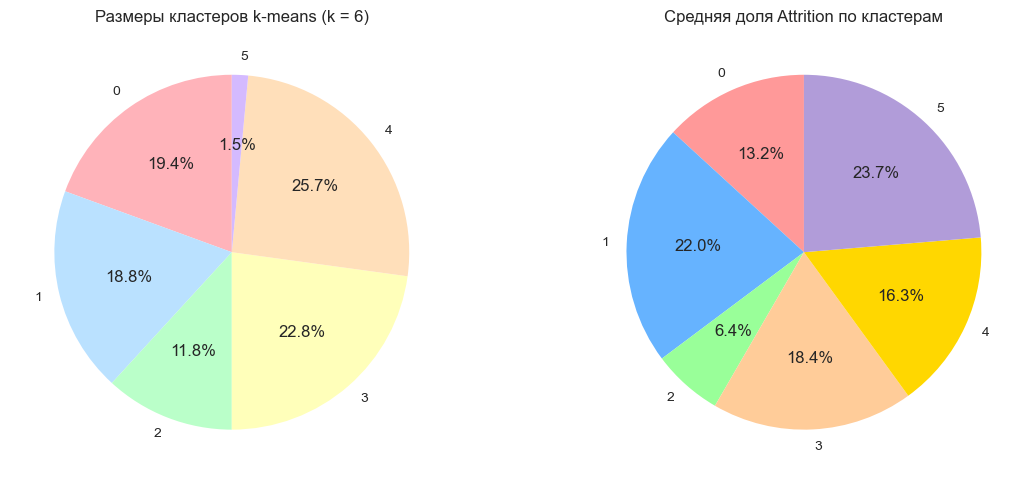

In [74]:
import matplotlib.pyplot as plt

# Количество сотрудников по кластерам
cluster_sizes = emp_with_clusters["cluster_kmeans"].value_counts().sort_index()

# Средняя доля Attrition по кластерам
attrition_rates = cluster_means_kmeans["Attrition"].sort_index()

colors_sizes = ['#FFB3BA', '#BAE1FF', '#BAFFC9', '#FFFFBA', '#FFDFBA', '#D4BAFF']
colors_attr = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#B19CD9']

plt.figure(figsize=(12, 5))

# Круговая диаграмма для размеров кластеров
plt.subplot(1, 2, 1)
plt.pie(cluster_sizes.values, labels=cluster_sizes.index, autopct='%1.1f%%', startangle=90, colors=colors_sizes)
plt.title("Размеры кластеров k-means (k = 6)")

# Круговая диаграмма для доли Attrition
plt.subplot(1, 2, 2)
plt.pie(attrition_rates.values, labels=attrition_rates.index, autopct='%1.1f%%', startangle=90, colors=colors_attr)
plt.title("Средняя доля Attrition по кластерам")

plt.tight_layout()
plt.show()


1) Кластер 0
* **Возраст:** 42 года
* **Уровень должности:** высокий (примерно 3,93)
* **Доход:** 7 017
* **Стаж в компании:** 19 лет
* **Оценка эффективности:** 3,02
* **Дистанция до работы:** 9,3 км
* **Часы обучения за последний год:** 101
* **Доля увольнений (Attrition):** 7,4 %
* **Размер кластера:** 592 сотрудника

Данный кластер представляет опытных специалистов, занимающих относительно высокие позиции. Сотрудники характеризуются умеренным доходом и низким уровнем текучести, что свидетельствует о высокой лояльности к компании.

2) Кластер 1
* **Возраст:** 41,6 года
* **Уровень должности:** низкий (примерно 1,96)
* **Доход:** 6 548
* **Стаж в компании:** 20,8 лет
* **Оценка эффективности:** 1,72
* **Дистанция до работы:** 9,6 км
* **Часы обучения за последний год:** 99,9
* **Доля увольнений:** 12,4 %
* **Размер кластера:** 572 сотрудника

Кластер включает сотрудников с длительным стажем на базовых позициях. Уровень результативности ниже среднего, а риск увольнения умеренно высок.

3) Кластер 2
* **Возраст:** 40,7 года
* **Уровень должности:** низкий (примерно 1,93)
* **Доход:** 15 714
* **Стаж в компании:** 20,3 лет
* **Оценка эффективности:** 2,93
* **Дистанция до работы:** 9,3 км
* **Часы обучения за последний год:** 95
* **Доля увольнений:** 3,6 %
* **Размер кластера:** 360 сотрудников

Небольшой, но финансово успешный кластер сотрудников с высоким доходом и минимальной текучестью. Вероятно, это ядро высокопродуктивных специалистов.

4) Кластер 3
* **Возраст:** 37,3 года
* **Уровень должности:** низкий (примерно 1,61)
* **Доход:** 6 694
* **Стаж в компании:** 8,6 лет
* **Оценка эффективности:** 3,13
* **Дистанция до работы:** 9,7 км
* **Часы обучения за последний год:** 97
* **Доля увольнений:** 10,3 %
* **Размер кластера:** 696 сотрудников

Группа молодых и результативных сотрудников с относительно небольшим стажем. Средний риск увольнения при высокой производительности.

5) Кластер 4
* **Возраст:** 44,2 года
* **Уровень должности:** низкий (примерно 1,66)
* **Доход:** 6 322
* **Стаж в компании:** 30,4 года
* **Оценка эффективности:** 3,21
* **Дистанция до работы:** 10,2 км
* **Часы обучения за последний год:** 102
* **Доля увольнений:** 9,2 %
* **Размер кластера:** 783 сотрудника

Крупный кластер старших сотрудников с очень длительным стажем. Риск текучести умеренный, эффективность находится на среднем уровне. Кластер характеризуется стабильностью и устойчивостью к увольнениям.

6) Кластер 5
* **Возраст:** 43,9 года
* **Уровень должности:** средний (примерно 2,36)
* **Доход:** 8 644
* **Стаж в компании:** 20,8 лет
* **Оценка эффективности:** 3,00
* **Дистанция до работы:** 46,7 км
* **Часы обучения за последний год:** 480
* **Доля увольнений:** 13,3 %
* **Размер кластера:** 45 сотрудников

Небольшой кластер сотрудников, работающих на значительном удалении от офиса и с экстремально высоким числом часов обучения. Отличается повышенным риском увольнения и высокой нагрузкой.

## 2.9 Метрики качества кластеризации k-means

In [75]:
seed = 42
k = 6
n_init = 10

kmeans_emp = KMeans(n_clusters=k, random_state=seed, n_init=n_init)
cluster_labels_kmeans = kmeans_emp.fit_predict(X_final)

# расчет метрик
from sklearn.metrics import (
    adjusted_rand_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    adjusted_mutual_info_score,
    silhouette_score
)

# внутренняя метрика (силуэт)
silhouette_kmeans = silhouette_score(X_final, cluster_labels_kmeans)
print(f"коэффициент силуэта: {silhouette_kmeans:.4f}")

# внешние метрики
ari_kmeans = adjusted_rand_score(y, cluster_labels_kmeans)
ami_kmeans = adjusted_mutual_info_score(y, cluster_labels_kmeans)
homo_kmeans = homogeneity_score(y, cluster_labels_kmeans)
comp_kmeans = completeness_score(y, cluster_labels_kmeans)
v_kmeans = v_measure_score(y, cluster_labels_kmeans)

print(f"ARI: {ari_kmeans:.4f}")
print(f"AMI: {ami_kmeans:.4f}")
print(f"homogeneity: {homo_kmeans:.4f}")
print(f"completeness: {comp_kmeans:.4f}")
print(f"V-measure: {v_kmeans:.4f}")

коэффициент силуэта: 0.0905
ARI: -0.0017
AMI: 0.0038
homogeneity: 0.0149
completeness: 0.0028
V-measure: 0.0047


## 2.10 Выводы по метрикам k-means

Полученные результаты оценки качества кластеризации свидетельствуют о крайне низкой эффективности алгоритма k-means для данной выборки. Коэффициент силуэта (0.0905) указывает на слабую выраженность кластерной структуры, что отражает значительное пересечение групп и отсутствие чётких границ между ними. Внешние метрики, сопоставляющие найденные кластеры с истинными метками Attrition, также демонстрируют минимальные значения: ARI (-0.0017), AMI (0.0038), homogeneity (0.0149), completeness (0.0028) и V-measure (0.0047). Эти показатели находятся вблизи нуля и подтверждают отсутствие соответствия между кластеризацией и фактическим распределением классов. Таким образом, с точки зрения предсказания факта увольнения кластеризация k-means на полном наборе признаков не даёт качественного разделения классов и скорее подходит для описательного сегментирования сотрудников по профилю признаков, чем для выделения информативных групп, хорошо совпадающих с целевым признаком Attrition.

Средний Silhouette Score: 0.526


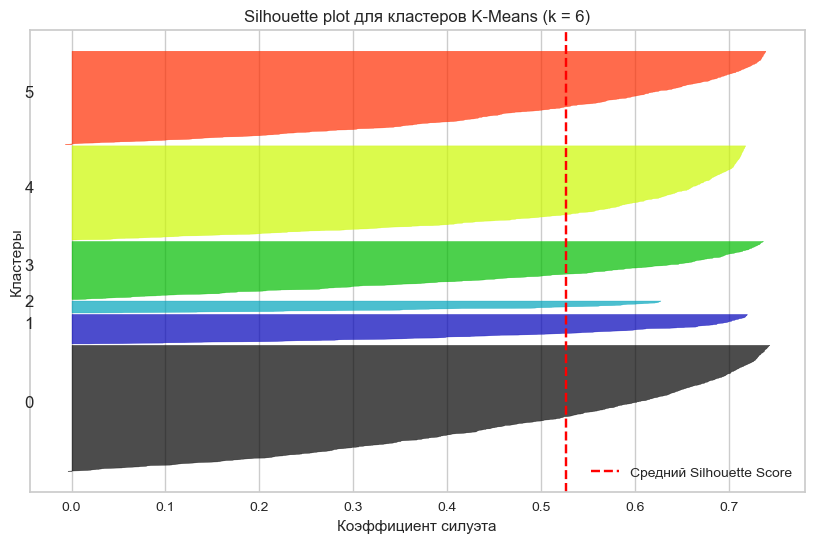

In [76]:
seed = 42
k = 6
n_init = 10

kmeans_emp = KMeans(n_clusters=k, random_state=seed, n_init=n_init)
cluster_labels_kmeans = kmeans_emp.fit_predict(X_final)

emp_with_clusters = emp_df.copy()
emp_with_clusters["cluster_kmeans"] = cluster_labels_kmeans

# подготовка данных
numeric_cols = emp_with_clusters.select_dtypes(include='number').columns

# используем все числовые признаки, исключая метку кластера
X = emp_with_clusters[numeric_cols].drop(columns=['cluster_kmeans'], errors='ignore')

# кластеризация для силуэта (k=6)
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# коэффициент силуэта
sil_score = silhouette_score(X, labels)
sample_sil_values = silhouette_samples(X, labels)

print(f"Средний Silhouette Score: {sil_score:.3f}")

fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(k):
    ith_cluster_sil_values = sample_sil_values[labels == i]
    ith_cluster_sil_values.sort()
    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_sil_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette plot для кластеров K-Means (k = 6)")
ax.set_xlabel("Коэффициент силуэта")
ax.set_ylabel("Кластеры")
ax.axvline(x=sil_score, color="red", linestyle="--", label="Средний Silhouette Score")
ax.set_yticks([])
ax.legend()
plt.show()

**Выводы о качестве кластеризации методом K-Means (k = 6) по коэффициенту силуэта**

Анализ Silhouette plot показывает, что средний коэффициент силуэта для кластеризации K-Means с k=6 составляет 0.526, что является умеренно высоким значением. Это свидетельствует о том, что кластеры достаточно хорошо различимы, а объекты в большинстве случаев находятся ближе к центру своего кластера, чем к центру соседних кластеров.

На графике видно, что все кластеры имеют положительные значения силуэта, что указывает на корректное распределение объектов по кластерам. При этом отдельные кластеры демонстрируют более широкий разброс значений силуэта, что может свидетельствовать о некоторой неоднородности внутри этих групп. В целом, визуализация подтверждает умеренно высокое качество кластеризации и относительно чёткое разделение сотрудников на 6 групп.

## 2.11 Кластеризация иерархическим агломеративным методом

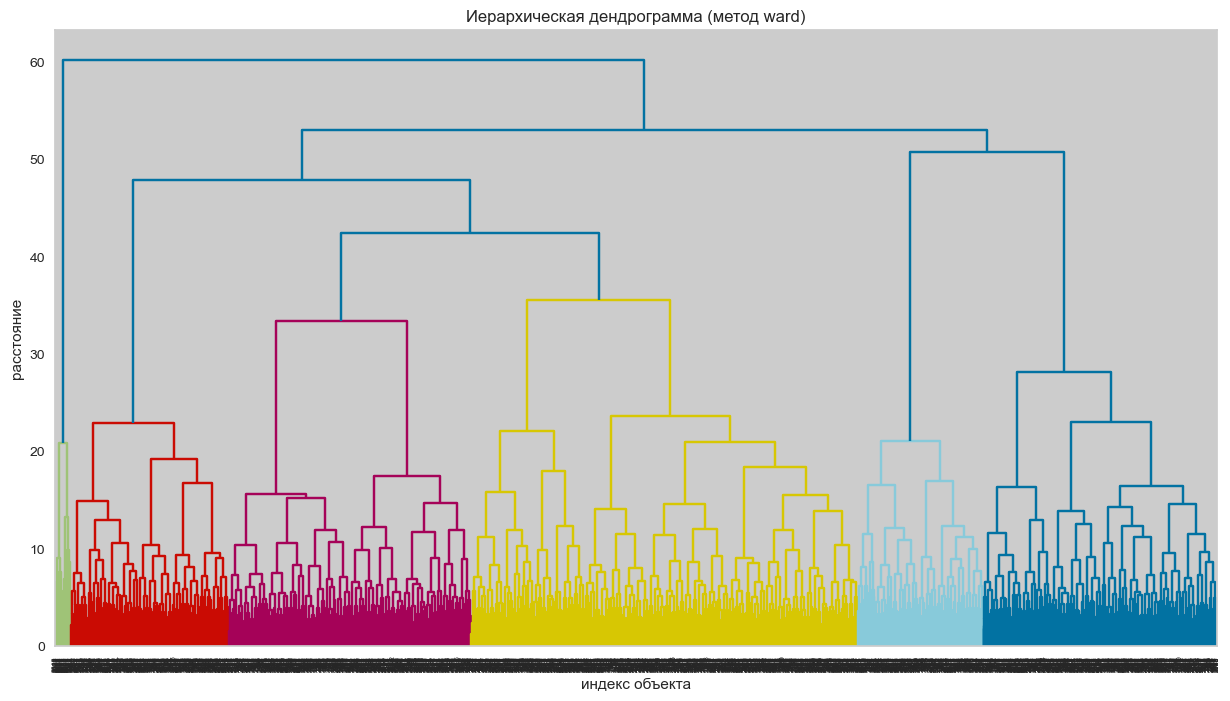

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_final, method="ward")

plt.figure(figsize=(15, 8))
plt.title("Иерархическая дендрограмма (метод ward)")
plt.xlabel("индекс объекта")
plt.ylabel("расстояние")

dendrogram(linkage_matrix, orientation="top")
plt.show()

**Выводы:**

Иерархическая дендрограмма демонстрирует процесс объединения объектов в кластеры на основе минимизации внутрикластерной дисперсии (метод Уорда). На графике видно несколько крупных ветвей, которые формируют устойчивые группы объектов до объединения на высоких уровнях расстояния.

Наблюдается, что до высоты примерно 30-35 единиц расстояния можно выделить 4–5 устойчивых кластеров, каждая из которых содержит относительно однородные подгруппы объектов. Ветки, соединяющиеся выше этой границы, объединяют кластеры с достаточно разнородными признаками, что указывает на ограниченную структурированность данных при высоком уровне агрегации.

Таким образом, дендрограмма подтверждает наличие нескольких естественных групп в данных, но при этом структура кластеров не является строго выраженной: некоторые подгруппы сильно различаются по расстоянию, а границы между кластерами размыты. Для дальнейшего анализа рекомендуется выбрать уровень разбиения, соответствующий 4–6 кластерам, что согласуется с результатами метода локтя и анализа силуэта для k-means.

## 2.12 Агломеративная кластеризация с фиксированным числом кластеров

In [78]:
# агломеративная кластеризация при k = 4
from sklearn.cluster import AgglomerativeClustering

k_agg = 4

agg_cluster = AgglomerativeClustering(n_clusters=k_agg, linkage="ward")
cluster_labels_agg = agg_cluster.fit_predict(X_final)

# добавляем метки агломеративных кластеров в датафрейм
emp_with_clusters["cluster_agg"] = cluster_labels_agg

# средние значения числовых признаков по каждому агломеративному кластеру
cluster_means_agg = emp_with_clusters.groupby("cluster_agg").mean(numeric_only=True)

print(f"средние значения числовых признаков по {k_agg} кластерам (агломеративный метод):")
print(cluster_means_agg)
print()

print("размер кластеров (число сотрудников в каждой группе, агломеративный метод):")
print(emp_with_clusters["cluster_agg"].value_counts())


средние значения числовых признаков по 4 кластерам (агломеративный метод):
                   age  job_level  monthly_income  years_at_company  \
cluster_agg                                                           
0            41.439166   1.818226     6515.367911         20.781386   
1            41.094225   1.759878    15134.802432         20.188450   
2            40.771615   3.654160     7763.828711         17.769984   
3            44.302326   2.372093     8714.604651         20.116279   

             performance_rating  distance_from_home_km  \
cluster_agg                                              
0                      2.743093              10.373921   
1                      3.024316               8.382736   
2                      3.048940               8.194780   
3                      3.000000              46.932558   

             training_hours_last_year  Attrition  cluster_kmeans  
cluster_agg                                                       
0              

На данном этапе проводится агломеративная кластеризация данных сотрудников с заданным числом кластеров (k = 4). Для этого используется алгоритм `AgglomerativeClustering` из библиотеки `scikit-learn` с методом связи «ward», который минимизирует суммарную внутрикластерную дисперсию. Сначала модель обучается на подготовленных признаках `X_final`, после чего каждому объекту присваивается метка кластера. Эти метки добавляются в исходный датафрейм `emp_with_clusters` в виде нового столбца `cluster_agg`. Далее выполняется агрегация данных: вычисляются средние значения числовых признаков для каждого кластера, что позволяет проанализировать характеристики сотрудников в каждой группе. Также определяется размер каждого кластера, то есть число сотрудников, попавших в соответствующую группу. Полученные результаты дают возможность выявить общие закономерности и различия между выделенными кластерами сотрудников.


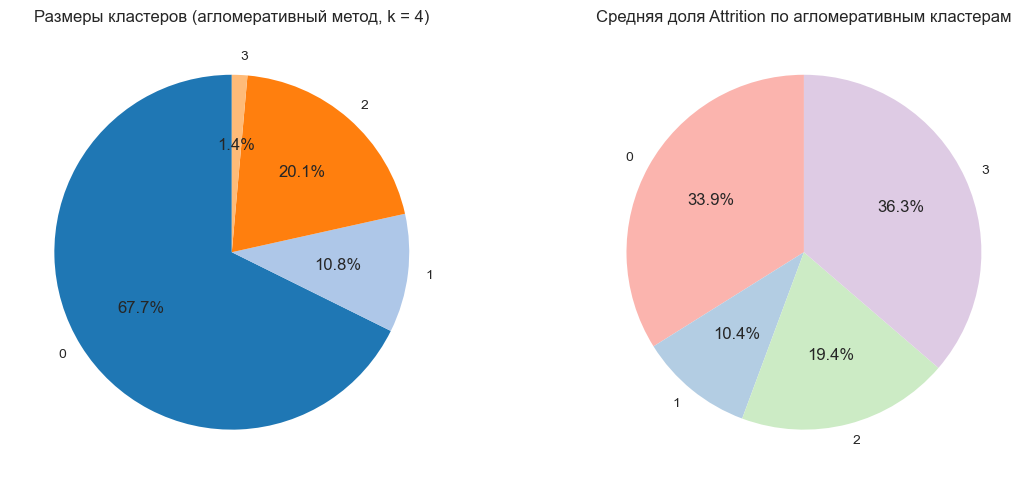

In [79]:
agg_sizes = emp_with_clusters["cluster_agg"].value_counts().sort_index()
agg_attrition_rates = cluster_means_agg["Attrition"].sort_index()

plt.figure(figsize=(12, 5))

# Круговая диаграмма для размеров кластеров
plt.subplot(1, 2, 1)
plt.pie(agg_sizes.values, labels=agg_sizes.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.tab20.colors)
plt.title("Размеры кластеров (агломеративный метод, k = 4)")

# Круговая диаграмма для доли Attrition
plt.subplot(1, 2, 2)
plt.pie(agg_attrition_rates.values, labels=agg_attrition_rates.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Средняя доля Attrition по агломеративным кластерам")

plt.tight_layout()
plt.show()


**Вывод:**

Кластер 0 доминирует по размеру (67.7%), что указывает на преобладание одной основной группы в данных. Наибольшая доля увольнений (36.3%) приходится на кластер 3 - наиболее уязвимую группу с точки зрения Attrition. Кластеры 1 и 2 имеют сопоставимые доли Attrition (10.4% и 19.4% соответственно), тогда как кластер 0, несмотря на свою численность, демонстрирует умеренную долю увольнений (33.9%). Это позволяет выделить кластер 3 как целевую группу для мер по удержанию персонала.

## 2.13 Метрики качества агломеративной кластеризации

In [80]:
# метрики качества для агломеративной кластеризации
silhouette_agg = silhouette_score(X_final, cluster_labels_agg)
print(f"коэффициент силуэта: {silhouette_agg:.4f}")

ari_agg = adjusted_rand_score(y, cluster_labels_agg)
ami_agg = adjusted_mutual_info_score(y, cluster_labels_agg)
homo_agg = homogeneity_score(y, cluster_labels_agg)
comp_agg = completeness_score(y, cluster_labels_agg)
v_agg = v_measure_score(y, cluster_labels_agg)

print(f"ARI: {ari_agg:.4f}")
print(f"AMI: {ami_agg:.4f}")
print(f"homogeneity: {homo_agg:.4f}")
print(f"completeness: {comp_agg:.4f}")
print(f"V-measure: {v_agg:.4f}")


коэффициент силуэта: 0.0687
ARI: -0.0389
AMI: 0.0079
homogeneity: 0.0170
completeness: 0.0058
V-measure: 0.0087


**Выводы:**

По результатам проведённой агломеративной кластеризации можно сделать следующие выводы. Значение коэффициента силуэта получилось очень низким (0.0687), что указывает на слабую выраженность кластерной структуры: объекты внутри кластеров практически не плотнее, чем между кластерами. Метрики, сравнивающие полученные кластеры с истинными метками y (ARI, AMI, homogeneity, completeness, V-measure), также демонстрируют крайне низкие значения, а ARI даже отрицательное (-0.0389), что свидетельствует о том, что кластеризация практически не совпадает с исходной разметкой. В целом, это говорит о том, что агломеративный метод с выбранным числом кластеров k=4 не смог выявить значимые группы в данных и, скорее всего, объекты распределены в пространстве признаков достаточно равномерно или имеют сложную структуру, которую данный метод не способен эффективно захватить.

# Выводы

В первой части работы на синтетическом двумерном наборе данных были рассмотрены свойства алгоритма k-means: при помощи коэффициента силуэта и метода локтя было показано, что оптимальное число кластеров соответствует реальной структуре данных (k = 3), тогда как разбиения на 2 и 4 кластера либо слишком грубо объединяют естественные группы, либо искусственно дробят их. это демонстрирует, как внутренние метрики и графические методы помогают выбирать число кластеров, соответствующее визуально наблюдаемой кластерной структуре.

Во второй части на реальном наборе employee_attrition была выполнена полная цепочка анализа: предобработка и стандартизация числовых признаков, кодирование категориальных переменных, кластеризация методом k-means с подбором числа кластеров по методу локтя, анализ профилей кластеров и их сравнение с целевым признаком Attrition. дополнительно была проведена агломеративная кластеризация с построением дендрограммы, выбором числа кластеров и расчётом метрик качества.

Расчёт коэффициента силуэта и внешних метрик (ARI, AMI, homogeneity, completeness, V-measure) показал, что и k-means, и агломеративный метод дают слабую геометрическую структуру кластеров и практически не согласуются с целевой переменной: кластеры хорошо описывают различные профили сотрудников (по возрасту, грейду, доходу, расстоянию до офиса, интенсивности обучения), но не выделяют отдельные группы "уволившихся" и "оставшихся". 

В итоге можно заключить, что для задачи прогнозирования увольнений на данном датасете целесообразнее использовать модели обучения с учителем, а методы кластеризации применять как инструмент описательного сегментирования и предварительного анализа данных, позволяющий выявлять группы сотрудников с различными характеристиками, но не заменяющий полноценную предиктивную модель.
